## Install Dependencies

In [ ]:
'''
Dependencies
'''
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report,silhouette_score
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Link the file

In [ ]:
'''
Link to google drive dataset, which follows the given format:
link = f"https://docs.google.com/spreadsheets/export?id={SHEET_ID}&format=xlsx"
You may use other methods to fetch the data, in that case ignore this cell.
'''

link = link

In [ ]:
data = pd.read_excel(link, engine='openpyxl')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 37 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                                                         --------------  -----         
 0   Timestamp                                                                                                                                      266 non-null    datetime64[ns]
 1   Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.                                   266 non-null    object        
 2   Gender                                                                                                                                         266 non-null    object        


## Data Pre-Processing

In [ ]:
'''
We will start with shortening the columns names.
'''

data = data.rename(
    columns={
        "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product." : "ATTD1",
        "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc." : "ATTD2",
        "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product." : "ATTD3",
        "ATTD4:  I have purchased products advertised on social media." : "ATTD4",
        "SN1: My family has influence over my purchasing habits through social media marketing." : "SN1",
        "SN2: People around me think that I should purchase products through social media." : "SN2",
        "SN3: I feel good if many people purchased products through social media." : "SN3",
        "SN4: My friends encourage me to purchase products through social media." : "SN4",
        "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it." : "PBC1",
        "PBC2: I will choose social media as a reference channel for purchasing in the future." : "PBC2",
        "PBC3: I will recommend social media channels to my friends to make purchasing decisions." : "PBC3",
        "PBC4: I will recommend social media channels to my family members to make purchasing decisions." : "PBC4",
    }
)

In [ ]:
'''
We will now proceed with data cleaning and drop columns that are not related to our primary constructs.
'''
# Drop first 13 columns
data = data.drop(columns = data.columns[:13])

# Drop last 8 columns
data = data.drop(columns = data.columns[-8:])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column                                                                                                   Non-Null Count  Dtype
---  ------                                                                                                   --------------  -----
 0   PB1: I am willing to buy a product promoted on social media.                                             266 non-null    int64
 1   PB2: There is a high probability that I would purchase a product because of the impact of social media.  266 non-null    int64
 2   PB3: I am easily influenced by advertisements on social media to make impulsive purchases.               266 non-null    int64
 3   PB4: I had the experience of buying a product due to the influence of social media.                      266 non-null    int64
 4   ATTD1                                                                                             

Using cronbachs alpha test, we have determined that PB1,..,PB4 all factors can be considered as a single factor and hence we will be taking an average of them to create a new factor called "PB" and we will use min-max normalization to further normalize the data.

In [ ]:
data['PB'] = (data['PB1: I am willing to buy a product promoted on social media.']
              + data['PB2: There is a high probability that I would purchase a product because of the impact of social media.']
              + data['PB3: I am easily influenced by advertisements on social media to make impulsive purchases.']
              + data['PB4: I had the experience of buying a product due to the influence of social media.'])/4

In [ ]:
data.head()

,PB1: I am willing to buy a product promoted on social media.,PB2: There is a high probability that I would purchase a product because of the impact of social media.,PB3: I am easily influenced by advertisements on social media to make impulsive purchases.,PB4: I had the experience of buying a product due to the influence of social media.,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB
0,4,5,4,5,4,4,4,5,2,3,3,4,4,5,5,4,4.50
1,2,2,2,4,3,4,5,2,2,2,3,2,2,2,2,2,2.50
2,2,2,2,3,2,2,4,3,2,2,3,3,1,2,3,3,2.25
3,2,3,2,4,2,3,3,2,1,3,2,3,2,3,2,2,2.75
4,2,3,4,4,3,4,4,5,3,4,4,4,3,3,2,2,3.25


In [ ]:
'''
We shall now drop the redundant columns for clarity.
'''
data = data.drop(columns=data.columns[:4])
data.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB
0,4,4,4,5,2,3,3,4,4,5,5,4,4.50
1,3,4,5,2,2,2,3,2,2,2,2,2,2.50
2,2,2,4,3,2,2,3,3,1,2,3,3,2.25
3,2,3,3,2,1,3,2,3,2,3,2,2,2.75
4,3,4,4,5,3,4,4,4,3,3,2,2,3.25


### Labeling y-hat

In [ ]:
data['y'] = data['PB'].apply(lambda x: 1 if x >= 2.5 else 0)
data.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB,y
0,4,4,4,5,2,3,3,4,4,5,5,4,4.50,1
1,3,4,5,2,2,2,3,2,2,2,2,2,2.50,1
2,2,2,4,3,2,2,3,3,1,2,3,3,2.25,0
3,2,3,3,2,1,3,2,3,2,3,2,2,2.75,1
4,3,4,4,5,3,4,4,4,3,3,2,2,3.25,1


### Data Splitting


In [ ]:
X = data.drop(columns=['y', 'PB'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
y_test.value_counts()

y
1    43
0    11
Name: count, dtype: int64

## Hyper-Parameter Optimization

In [ ]:
'''
Parameters to be optimized
'''

param_grids = {
    'mlp': {
        'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'mlp__activation': ['tanh', 'relu', 'logistic'],
        'mlp__solver': ['sgd', 'adam'],
        'mlp__alpha': [0.0001, 0.001],
        'mlp__learning_rate': ['constant', 'adaptive']
    },
    'svm': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__gamma': ['scale', 'auto']
    },
    'logistic_regression': {
        'logistic_regression__C': [0.1, 1, 10],
        'logistic_regression__penalty': ['l1', 'l2'],
        'logistic_regression__solver': ['liblinear']
    },
    'knn': {
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'decision_tree': {
        'decision_tree__criterion': ['gini', 'entropy'],
        'decision_tree__max_depth': [None, 10, 20],
        'decision_tree__min_samples_split': [2, 5, 10]
    },
    'adaboost': {
        'adaboost__n_estimators': [50, 100, 200],
        'adaboost__learning_rate': [0.01, 0.1, 1]
    },
    'random_forest': {
        'random_forest__n_estimators': [100, 200, 500],
        'random_forest__max_features': ['sqrt', 'log2'],
        'random_forest__max_depth': [None, 10, 20]
    },
    'gradient_boosting': {
        'gradient_boosting__n_estimators': [100, 200, 300, 400, 500],
        'gradient_boosting__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'gradient_boosting__max_depth': [3, 4, 5, 6, 7]
    },

}


In [ ]:
models = {
    'mlp': MLPClassifier(max_iter=1000),
    'svm': SVC(probability=True),
    'logistic_regression': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'adaboost': AdaBoostClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),

}
scaler = StandardScaler()

In [ ]:
def hyperparameter_optimization(X_train, y_train, X_test, y_test, comb, models, param_grids, cv_folds=5):
    if not os.path.exists(comb):
        os.makedirs(comb)

    print(f"__________________________________________{comb}__________________________________________\n")
    best_params = {}
    best_scores = {}
    test_scores = {}
    confusion_matrices = {}
    roc_curves = {}
    pr_curves = {}

    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    for model_name, model in models.items():
        print(f"Optimizing hyperparameters for {comb} {model_name}...")

        # In this pipeline we used standardization of the columns.
        pipeline = Pipeline([
            # ('scaler', StandardScaler()),
            (model_name, model)
        ])

        # Get parameter grid
        param_grid = param_grids.get(model_name, {})

        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Store best parameters and best score
        best_params[model_name] = grid_search.best_params_
        best_scores[model_name] = grid_search.best_score_

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.2f}\n")

        # Test the model with best parameters on the whole dataset
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)

        test_score = round(accuracy_score(y_test, y_pred),2)
        test_scores[model_name] = test_score

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[model_name] = cm

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        roc_curves[model_name] = (fpr, tpr, roc_auc)

        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_curves[model_name] = (precision, recall)

        print(f"Test score for {model_name} with best parameters: {test_score:.2f}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

    return best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves


## Plotting Functions

In [ ]:
def plot_figures():
    if not os.path.exists(comb):
      os.makedirs(comb)

    # ROC Curves
    plt.figure()
    sns.set(style="whitegrid")
    for model_name in models.keys():
        fpr, tpr, roc_auc = roc_curves[model_name]
        plt.plot(fpr, tpr, linestyle=':', label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of {comb}')
    plt.legend(loc="lower right", prop={'size':8})
    plt.savefig(os.path.join(comb, 'Combined_ROC_curve.png'))
    plt.show()

    # Precision-Recall Curves
    plt.figure()
    for model_name in models.keys():
        precision, recall = pr_curves[model_name]
        pr_auc = auc(recall, precision)  # Calculate AUC for Precision-Recall curve
        plt.plot(recall, precision, linestyle=':', label=f'{model_name} (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision Recall Curve of {comb}')
    plt.legend(loc="lower left", prop={'size':8})
    plt.savefig(os.path.join(comb, f'Combined_Precision_Recall_curve{comb}.png'))
    plt.show()




In [ ]:
def plot_learning_curve(model):
  # Learning Curves
    cv = 5  # Number of cross-validation folds
    plt.figure()
    for model_name, model in models.items():
        train_sizes, train_scores, valid_scores = learning_curve(
            model, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        plt.plot(train_sizes, train_mean, 'o-', linestyle=':', label=f'{model_name} Training score')
        plt.plot(train_sizes, valid_mean, 'o-', linestyle='-', label=f'{model_name} Validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves for {comb}')
    plt.legend(loc='best', prop={'size': 8})
    plt.grid()
    plt.savefig(os.path.join(comb, f'Combined_Learning_curve{comb}.png'))
    plt.show()

In [ ]:
def plot_confusion_matrix(model):

  cm = confusion_matrices[model]

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap= sns.color_palette("flare_r", as_cmap=True),
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix of Best Performing Model : {model} in {comb}.png')
  plt.savefig(os.path.join(comb, f'Confusion_matrix_{comb}.png'))
  plt.show()


## Find Hyperparameter and Train model on 7 different combinations

## ATTD & SN & PBC

In [ ]:
comb = "ATTD,SN & PBC"
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_train, y_train,X_test, y_test, comb, models, param_grids)

__________________________________________ATTD,SN & PBC__________________________________________

Optimizing hyperparameters for ATTD,SN & PBC mlp...
Best parameters for mlp: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'sgd'}
Best cross-validation score for mlp: 0.87

Test score for mlp with best parameters: 0.85
Confusion Matrix:
[[ 5  6]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.87      0.95      0.91        43

    accuracy                           0.85        54
   macro avg       0.79      0.70      0.73        54
weighted avg       0.84      0.85      0.84        54


Optimizing hyperparameters for ATTD,SN & PBC svm...
Best parameters for svm: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-validation score for svm: 0.85

Test score for svm wit

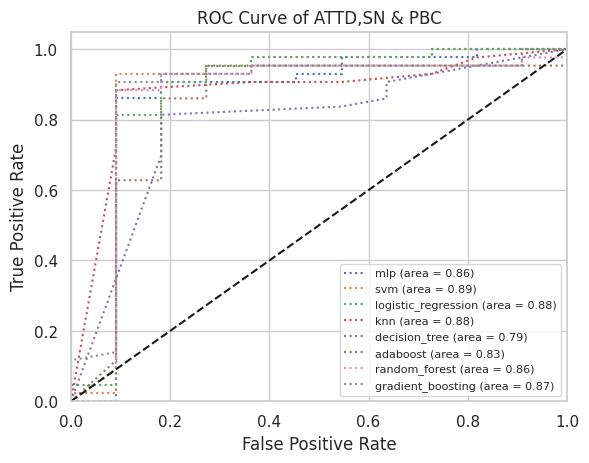

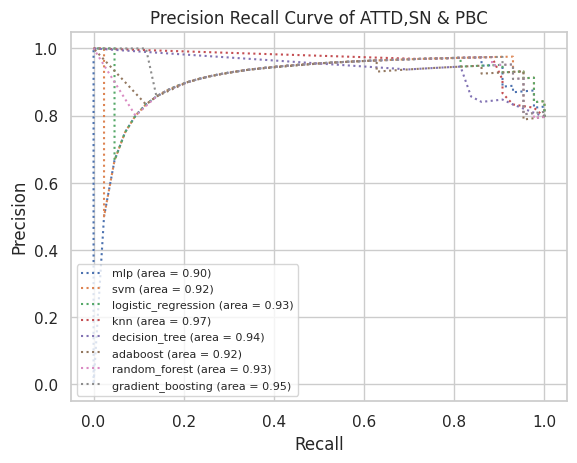

In [ ]:
plot_figures()

In [ ]:
best_params, test_scores

({'mlp': {'mlp__activation': 'relu',
   'mlp__alpha': 0.0001,
   'mlp__hidden_layer_sizes': (50, 50),
   'mlp__learning_rate': 'adaptive',
   'mlp__solver': 'sgd'},
  'svm': {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
  'logistic_regression': {'logistic_regression__C': 0.1,
   'logistic_regression__penalty': 'l1',
   'logistic_regression__solver': 'liblinear'},
  'knn': {'knn__metric': 'manhattan',
   'knn__n_neighbors': 7,
   'knn__weights': 'uniform'},
  'decision_tree': {'decision_tree__criterion': 'gini',
   'decision_tree__max_depth': None,
   'decision_tree__min_samples_split': 10},
  'adaboost': {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 200},
  'random_forest': {'random_forest__max_depth': None,
   'random_forest__max_features': 'sqrt',
   'random_forest__n_estimators': 500},
  'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
   'gradient_boosting__max_depth': 3,
   'gradient_boosting__n_estimators': 300}},
 {'mlp': 0.85,
  'sv

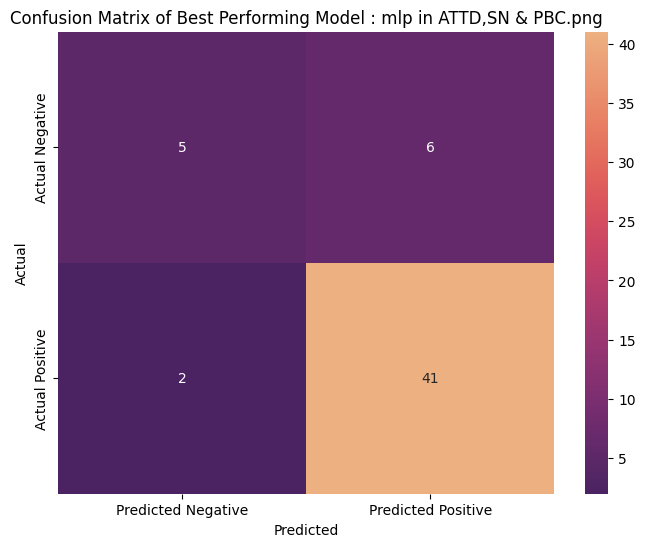

In [ ]:
plot_confusion_matrix('mlp')


## ATTD & SN

In [ ]:
X_tr = X_train.drop(columns = X_train.columns[8:])
X_tr.head()
X_tst = X_test.drop(columns = X_test.columns[8:])
X_tst.head()

,ATTD1,ATTD2,ATTD3,ATTD4,SN1,SN2,SN3,SN4
129,5,5,3,5,2,3,4,3
10,4,2,4,2,4,3,3,2
71,3,4,2,4,2,3,4,2
30,5,4,5,5,3,4,5,5
36,5,4,3,4,1,1,2,1


In [ ]:
comb = "ATTD & SN"
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train,X_tst, y_test, comb, models, param_grids)

__________________________________________ATTD & SN__________________________________________

Optimizing hyperparameters for ATTD & SN mlp...
Best parameters for mlp: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'sgd'}
Best cross-validation score for mlp: 0.86

Test score for mlp with best parameters: 0.91
Confusion Matrix:
[[ 9  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.95      0.93      0.94        43

    accuracy                           0.91        54
   macro avg       0.85      0.87      0.86        54
weighted avg       0.91      0.91      0.91        54


Optimizing hyperparameters for ATTD & SN svm...
Best parameters for svm: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score for svm: 0.85

Test score for svm with best parameters:

In [ ]:
best_params, test_scores

({'mlp': {'mlp__activation': 'relu',
   'mlp__alpha': 0.0001,
   'mlp__hidden_layer_sizes': (50,),
   'mlp__learning_rate': 'adaptive',
   'mlp__solver': 'sgd'},
  'svm': {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'},
  'logistic_regression': {'logistic_regression__C': 0.1,
   'logistic_regression__penalty': 'l2',
   'logistic_regression__solver': 'liblinear'},
  'knn': {'knn__metric': 'euclidean',
   'knn__n_neighbors': 7,
   'knn__weights': 'uniform'},
  'decision_tree': {'decision_tree__criterion': 'gini',
   'decision_tree__max_depth': None,
   'decision_tree__min_samples_split': 10},
  'adaboost': {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 200},
  'random_forest': {'random_forest__max_depth': 10,
   'random_forest__max_features': 'sqrt',
   'random_forest__n_estimators': 100},
  'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
   'gradient_boosting__max_depth': 4,
   'gradient_boosting__n_estimators': 100}},
 {'mlp': 0.91,
  'svm': 0.89,

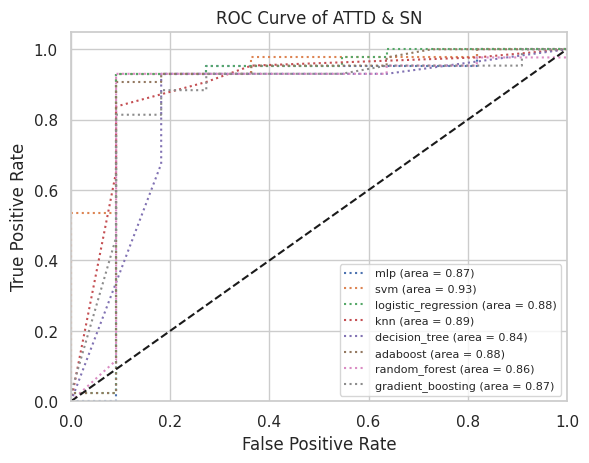

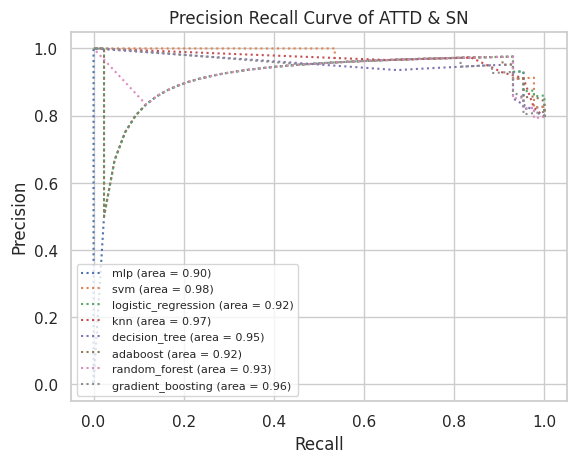

In [ ]:
plot_figures()

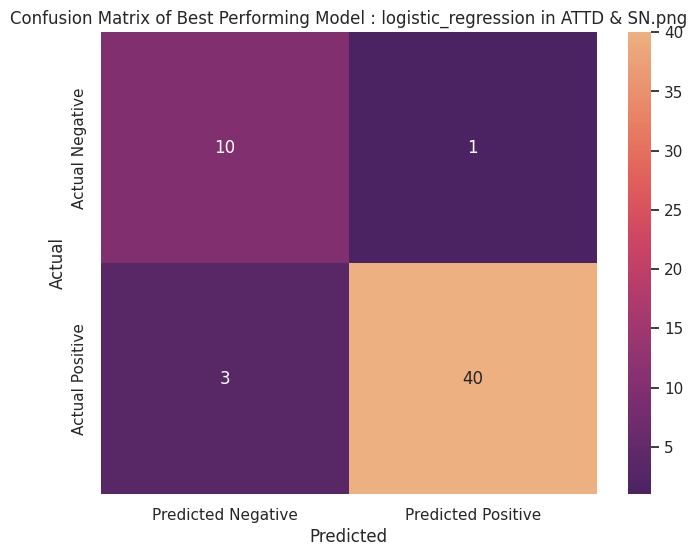

In [ ]:
plot_confusion_matrix('logistic_regression')

## Attitude & PBC

In [ ]:
comb = "ATTD & PBC"
X_tr = X_train.drop(columns=X_train.columns[4:8])
X_tst = X_test.drop(columns=X_test.columns[4:8])
X_tr.head()

,ATTD1,ATTD2,ATTD3,ATTD4,PBC1,PBC2,PBC3,PBC4
82,4,4,3,5,4,4,3,4
136,3,3,2,2,2,3,2,5
8,5,5,5,5,5,5,5,5
105,4,4,3,4,4,4,5,4
51,4,4,4,3,4,3,3,2


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________ATTD & PBC__________________________________________

Optimizing hyperparameters for ATTD & PBC mlp...
Best parameters for mlp: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate': 'constant', 'mlp__solver': 'sgd'}
Best cross-validation score for mlp: 0.87

Test score for mlp with best parameters: 0.87
Confusion Matrix:
[[ 5  6]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.88      0.98      0.92        43

    accuracy                           0.87        54
   macro avg       0.85      0.72      0.76        54
weighted avg       0.87      0.87      0.85        54


Optimizing hyperparameters for ATTD & PBC svm...
Best parameters for svm: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score for svm: 0.88

Test score for svm with best parame

In [ ]:
test_scores

{'mlp': 0.87,
 'svm': 0.83,
 'logistic_regression': 0.87,
 'knn': 0.8,
 'decision_tree': 0.8,
 'adaboost': 0.87,
 'random_forest': 0.81,
 'gradient_boosting': 0.83}

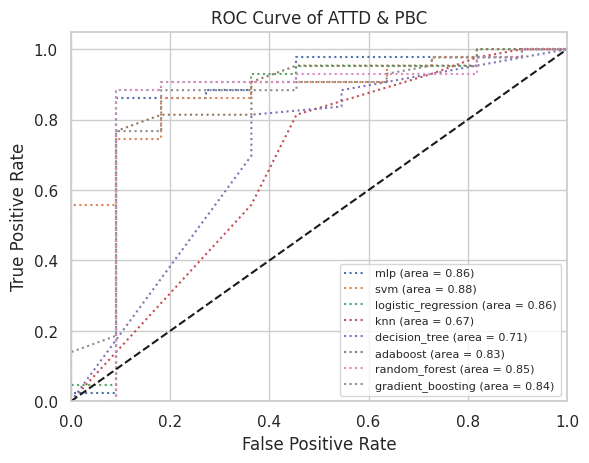

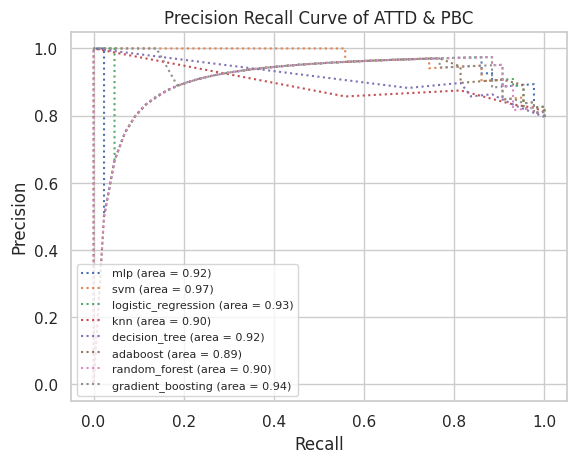

In [ ]:
plot_figures()

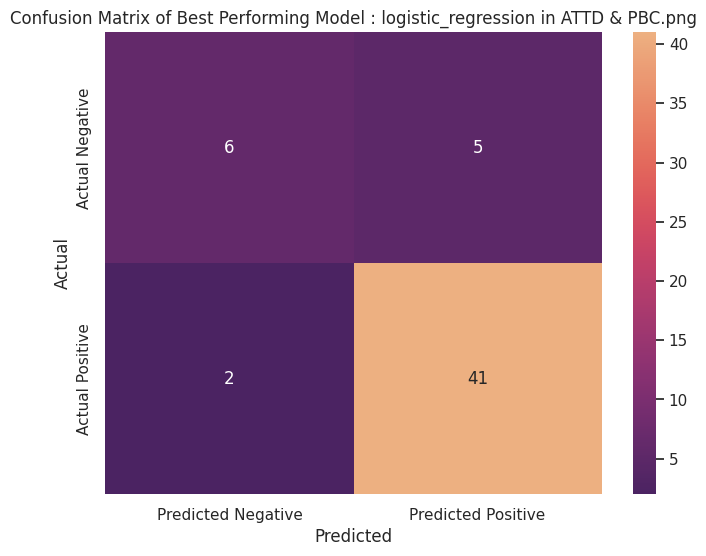

In [ ]:
plot_confusion_matrix('logistic_regression')

## SN and PBC

In [ ]:
comb = "SN & PBC"
X_tr = X_train.drop(columns=X_train.columns[:4])
X_tst = X_test.drop(columns=X_test.columns[:4])
X_tr.head()

,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4
82,3,4,4,3,4,4,3,4
136,3,2,1,3,2,3,2,5
8,5,5,5,5,5,5,5,5
105,2,4,4,5,4,4,5,4
51,2,4,4,4,4,3,3,2


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________SN & PBC__________________________________________

Optimizing hyperparameters for SN & PBC mlp...
Best parameters for mlp: {'mlp__activation': 'tanh', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'sgd'}
Best cross-validation score for mlp: 0.85

Test score for mlp with best parameters: 0.87
Confusion Matrix:
[[ 7  4]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.91      0.93      0.92        43

    accuracy                           0.87        54
   macro avg       0.80      0.78      0.79        54
weighted avg       0.87      0.87      0.87        54


Optimizing hyperparameters for SN & PBC svm...
Best parameters for svm: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Best cross-validation score for svm: 0.84

Test score for svm with best parameters:

In [ ]:
test_scores

{'mlp': 0.87,
 'svm': 0.83,
 'logistic_regression': 0.89,
 'knn': 0.81,
 'decision_tree': 0.76,
 'adaboost': 0.81,
 'random_forest': 0.85,
 'gradient_boosting': 0.8}

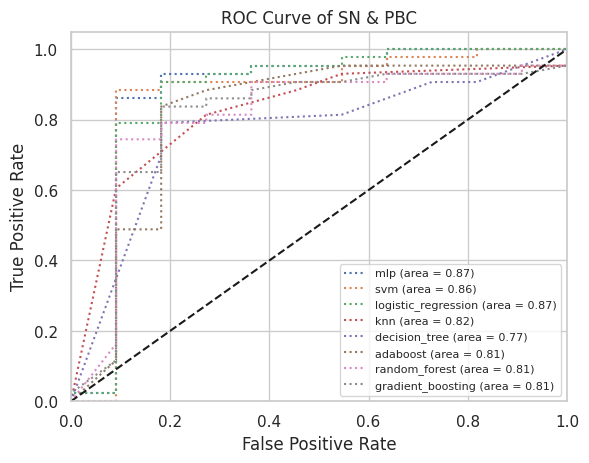

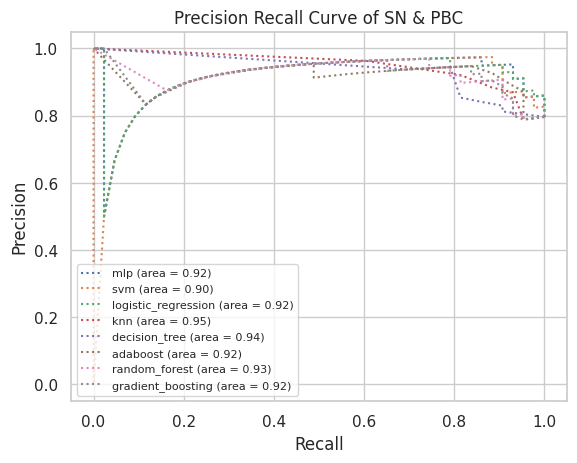

In [ ]:
plot_figures()

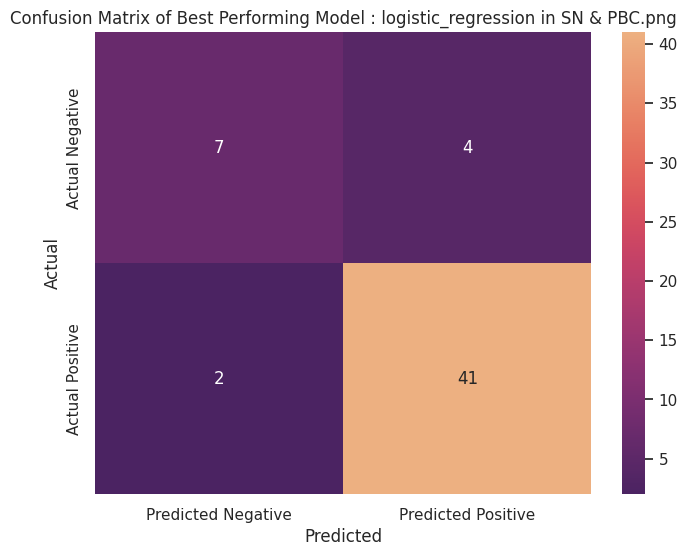

In [ ]:
plot_confusion_matrix( 'logistic_regression')

## ATTD

In [ ]:
comb = "ATTD"
X_tr = X_train.drop(columns=X_train.columns[4:])
X_tst = X_test.drop(columns=X_test.columns[4:])
X_tr.head()

,ATTD1,ATTD2,ATTD3,ATTD4
82,4,4,3,5
136,3,3,2,2
8,5,5,5,5
105,4,4,3,4
51,4,4,4,3


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________ATTD__________________________________________

Optimizing hyperparameters for ATTD mlp...
Best parameters for mlp: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'sgd'}
Best cross-validation score for mlp: 0.85

Test score for mlp with best parameters: 0.87
Confusion Matrix:
[[ 4  7]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.86      1.00      0.92        43

    accuracy                           0.87        54
   macro avg       0.93      0.68      0.73        54
weighted avg       0.89      0.87      0.85        54


Optimizing hyperparameters for ATTD svm...
Best parameters for svm: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-validation score for svm: 0.85

Test score for svm with best parameters: 0.87
Conf

In [ ]:
best_params

{'mlp': {'mlp__activation': 'tanh',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (50,),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'sgd'},
 'svm': {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'},
 'logistic_regression': {'logistic_regression__C': 0.1,
  'logistic_regression__penalty': 'l1',
  'logistic_regression__solver': 'liblinear'},
 'knn': {'knn__metric': 'manhattan',
  'knn__n_neighbors': 5,
  'knn__weights': 'uniform'},
 'decision_tree': {'decision_tree__criterion': 'entropy',
  'decision_tree__max_depth': None,
  'decision_tree__min_samples_split': 10},
 'adaboost': {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100},
 'random_forest': {'random_forest__max_depth': 10,
  'random_forest__max_features': 'sqrt',
  'random_forest__n_estimators': 500},
 'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
  'gradient_boosting__max_depth': 3,
  'gradient_boosting__n_estimators': 200}}

In [ ]:
test_scores

{'mlp': 0.87,
 'svm': 0.87,
 'logistic_regression': 0.83,
 'knn': 0.81,
 'decision_tree': 0.78,
 'adaboost': 0.85,
 'random_forest': 0.87,
 'gradient_boosting': 0.85}

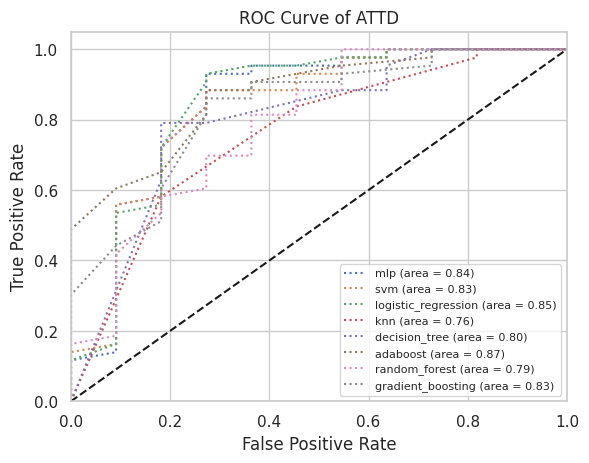

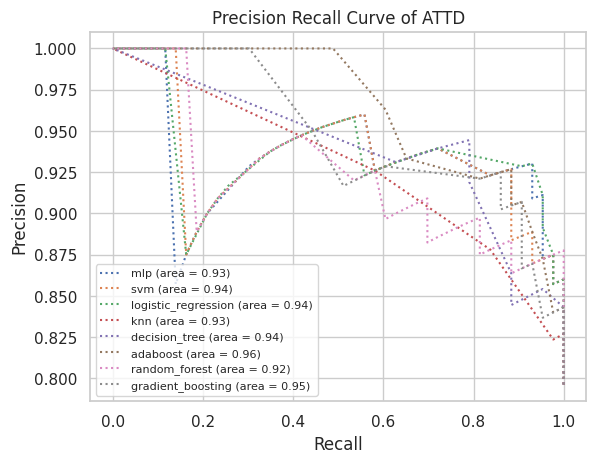

In [ ]:
plot_figures()

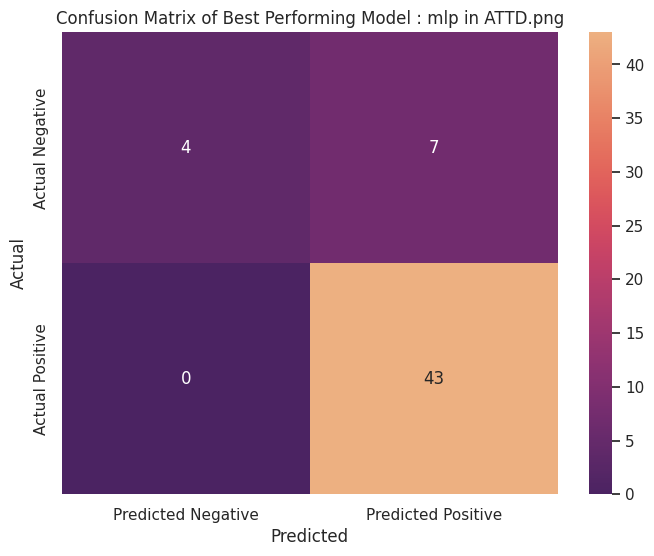

In [ ]:
plot_confusion_matrix('mlp')

## SN

In [ ]:
comb = "SN"
X_tr = X_train.iloc[:, [4,5,6,7]]
X_tst = X_test.iloc[:, [4,5,6,7]]
X_tr.head()

,SN1,SN2,SN3,SN4
82,3,4,4,3
136,3,2,1,3
8,5,5,5,5
105,2,4,4,5
51,2,4,4,4


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________SN__________________________________________

Optimizing hyperparameters for SN mlp...
Best parameters for mlp: {'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Best cross-validation score for mlp: 0.82

Test score for mlp with best parameters: 0.83
Confusion Matrix:
[[ 2  9]
 [ 0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.83      1.00      0.91        43

    accuracy                           0.83        54
   macro avg       0.91      0.59      0.61        54
weighted avg       0.86      0.83      0.78        54


Optimizing hyperparameters for SN svm...
Best parameters for svm: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score for svm: 0.85

Test score for svm with best parameters: 0.81
Confusion 

In [ ]:
test_scores

{'mlp': 0.83,
 'svm': 0.81,
 'logistic_regression': 0.85,
 'knn': 0.85,
 'decision_tree': 0.74,
 'adaboost': 0.85,
 'random_forest': 0.76,
 'gradient_boosting': 0.81}

In [ ]:
best_params

{'mlp': {'mlp__activation': 'logistic',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (50,),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'adam'},
 'svm': {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'},
 'logistic_regression': {'logistic_regression__C': 10,
  'logistic_regression__penalty': 'l1',
  'logistic_regression__solver': 'liblinear'},
 'knn': {'knn__metric': 'euclidean',
  'knn__n_neighbors': 7,
  'knn__weights': 'uniform'},
 'decision_tree': {'decision_tree__criterion': 'entropy',
  'decision_tree__max_depth': None,
  'decision_tree__min_samples_split': 2},
 'adaboost': {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 50},
 'random_forest': {'random_forest__max_depth': 10,
  'random_forest__max_features': 'sqrt',
  'random_forest__n_estimators': 100},
 'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
  'gradient_boosting__max_depth': 3,
  'gradient_boosting__n_estimators': 100}}

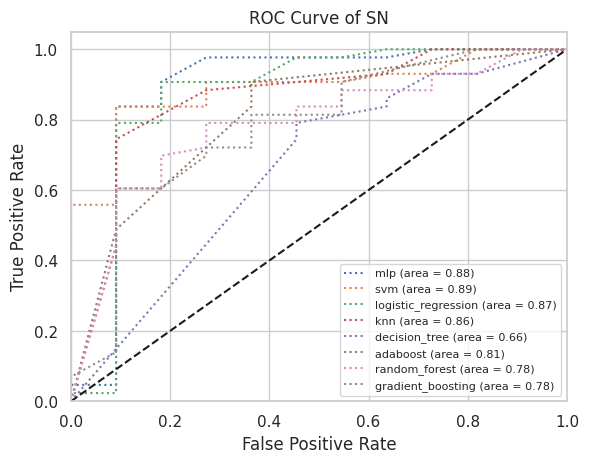

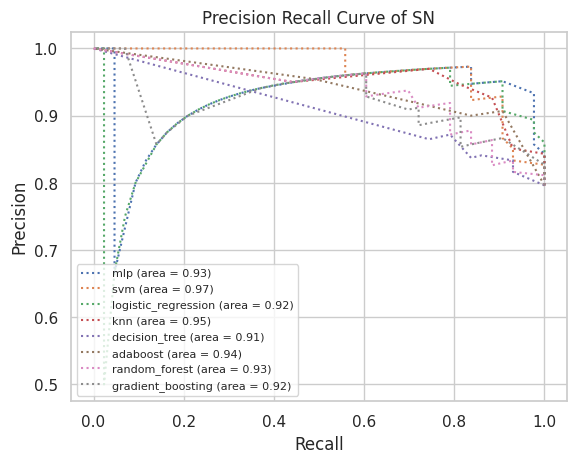

In [ ]:
plot_figures()

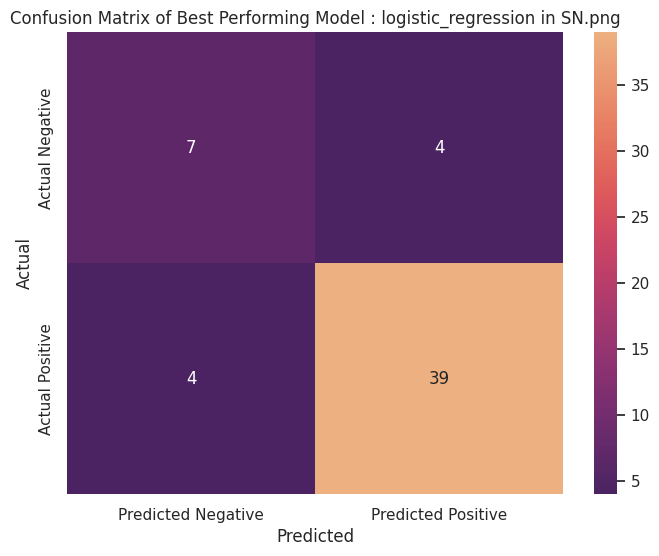

In [ ]:
plot_confusion_matrix('logistic_regression')

## PBC

In [ ]:
comb = "PBC"
X_tr = X_train.drop(columns = X_train.columns[:8])
X_tst = X_test.drop(columns = X_test.columns[:8])
X_tst.head()

,PBC1,PBC2,PBC3,PBC4
129,4,5,3,3
10,2,3,3,3
71,3,3,4,3
30,5,4,4,3
36,1,3,2,3


In [ ]:
best_params, best_scores, test_scores, confusion_matrices, roc_curves, pr_curves = hyperparameter_optimization(X_tr, y_train, X_tst, y_test, comb, models, param_grids)

__________________________________________PBC__________________________________________

Optimizing hyperparameters for PBC mlp...
Best parameters for mlp: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'sgd'}
Best cross-validation score for mlp: 0.86

Test score for mlp with best parameters: 0.81
Confusion Matrix:
[[ 4  7]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.85      0.93      0.89        43

    accuracy                           0.81        54
   macro avg       0.71      0.65      0.67        54
weighted avg       0.79      0.81      0.80        54


Optimizing hyperparameters for PBC svm...
Best parameters for svm: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score for svm: 0.86

Test score for svm with best parameters: 0.80
Confusion Ma

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for knn: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Best cross-validation score for knn: 0.83

Test score for knn with best parameters: 0.72
Confusion Matrix:
[[ 5  6]
 [ 9 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.85      0.79      0.82        43

    accuracy                           0.72        54
   macro avg       0.60      0.62      0.61        54
weighted avg       0.75      0.72      0.73        54


Optimizing hyperparameters for PBC decision_tree...
Best parameters for decision_tree: {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': None, 'decision_tree__min_samples_split': 10}
Best cross-validation score for decision_tree: 0.79

Test score for decision_tree with best parameters: 0.74
Confusion Matrix:
[[ 5  6]
 [ 8 35]]
Classification Report:
              precision    recall  f1-score   suppor

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for adaboost: {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 100}
Best cross-validation score for adaboost: 0.85

Test score for adaboost with best parameters: 0.76
Confusion Matrix:
[[ 1 10]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.80      0.93      0.86        43

    accuracy                           0.76        54
   macro avg       0.53      0.51      0.50        54
weighted avg       0.69      0.76      0.71        54


Optimizing hyperparameters for PBC random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 20, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 200}
Best cross-validation score for random_forest: 0.82

Test score for random_forest with best parameters: 0.80
Confusion Matrix:
[[ 3  8]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support


In [ ]:
best_params

{'mlp': {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (50,),
  'mlp__learning_rate': 'adaptive',
  'mlp__solver': 'sgd'},
 'svm': {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'},
 'logistic_regression': {'logistic_regression__C': 0.1,
  'logistic_regression__penalty': 'l1',
  'logistic_regression__solver': 'liblinear'},
 'knn': {'knn__metric': 'manhattan',
  'knn__n_neighbors': 3,
  'knn__weights': 'uniform'},
 'decision_tree': {'decision_tree__criterion': 'gini',
  'decision_tree__max_depth': None,
  'decision_tree__min_samples_split': 10},
 'adaboost': {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 100},
 'random_forest': {'random_forest__max_depth': 20,
  'random_forest__max_features': 'sqrt',
  'random_forest__n_estimators': 200},
 'gradient_boosting': {'gradient_boosting__learning_rate': 0.01,
  'gradient_boosting__max_depth': 3,
  'gradient_boosting__n_estimators': 100}}

In [ ]:
test_scores

{'mlp': 0.81,
 'svm': 0.8,
 'logistic_regression': 0.81,
 'knn': 0.72,
 'decision_tree': 0.74,
 'adaboost': 0.76,
 'random_forest': 0.8,
 'gradient_boosting': 0.76}

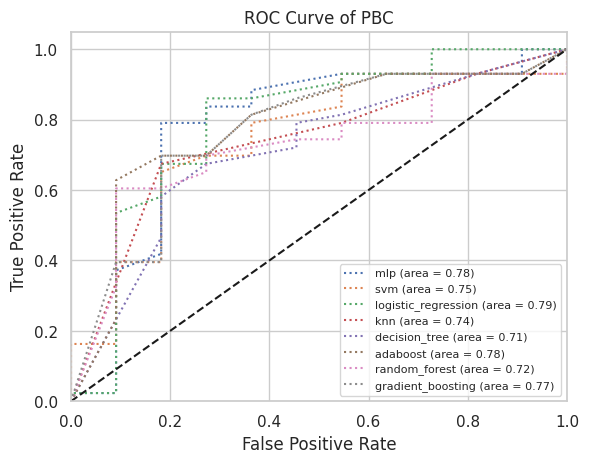

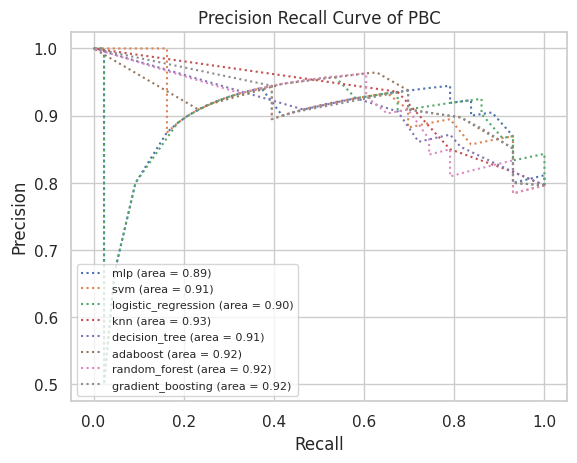

In [ ]:
plot_figures()

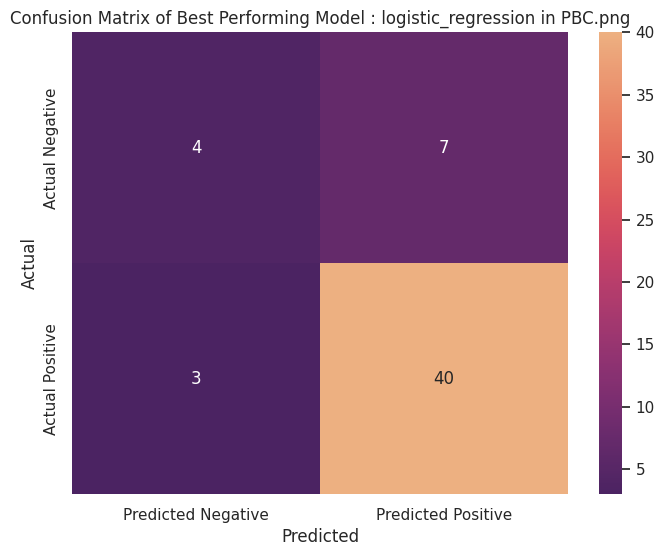

In [ ]:
plot_confusion_matrix('logistic_regression')